In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from vqls import *
import time

label = 'elu'
lower = -1
upper = 1.
n_step = 20

In [24]:
path = "results/results_gvqs_relu_4.json"           
df = pd.read_json(path)
print(df.shape)
for i in range(1,6):

    path1 = f'result{i}.json'
    df2 = pd.read_json(path1)
    print(df2.shape)
    df = pd.concat([df,df2], axis = 0)
print(df.shape)

(10, 8)
(1, 8)
(3, 8)
(3, 8)
(3, 8)
(2, 8)
(22, 8)


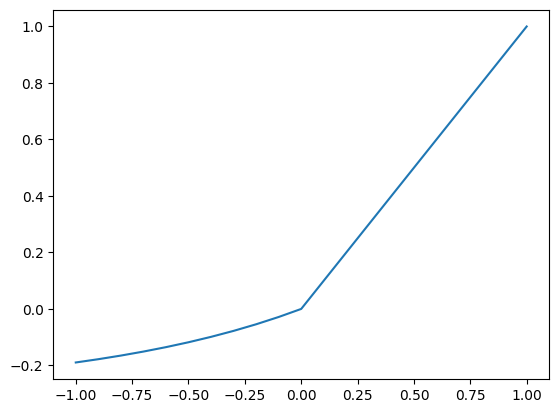

In [3]:
func_out =   {'sigmoid': sigmoid,'tanh': tanh,'elu': elu, 'relu': relu, 'sin':sin_o}
func=func_out[label]
func_dict =  {'sigmoid': .0,'tanh': 1.0,'elu':0, 'relu':.0, 'sin':1}
f_i = func_dict[label]
x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in x]
plt.plot(x,y)

[0.484375 0.515625]


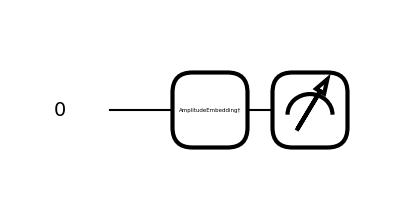

In [8]:
dev_v = qml.device("qiskit.aer", wires=1, shots=1024)
@qml.qnode(dev_v)
def prod(w,x):
    qml.Hadamard(wires=0)

    # A very minimal variational circuit.
    qml.RY(w, wires=0)

    qml.adjoint(qml.AmplitudeEmbedding)(x,wires=0,pad_with=1.0) #points encoding
    return qml.probs(0)
res = prod([1,1])
print(res)

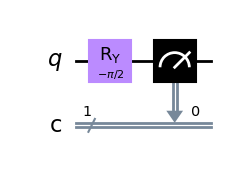

In [9]:
dev_v._circuit.draw(output="mpl")
